# Case-I Generating Free energy landscape (FEL) & extracting conformations at minima regions using GROMACS

## Generating FEL & extracting minima points

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
# Load data from file
data = np.loadtxt('fel.dat')

# Extract x, y, and z coordinates
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

Minima points:
Point 1: x = -0.56445, y = -5.79882, z = 0.0


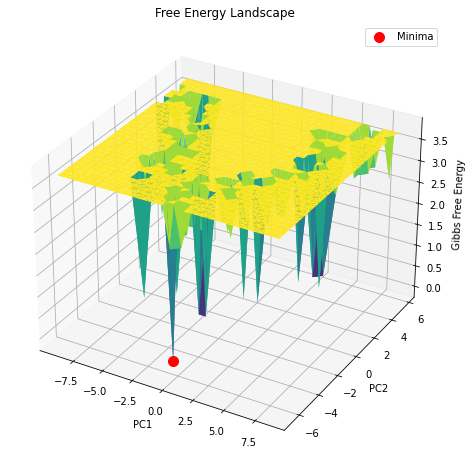

In [12]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the free energy landscape
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Gibbs Free Energy')
ax.set_title('Free Energy Landscape')

# Identify minima points directly from the original data
minima_indices = np.argwhere(z == np.min(z))
minima_x = x[minima_indices[:, 0]]
minima_y = y[minima_indices[:, 0]]
minima_z = z[minima_indices[:, 0]]

# Set the maximum number of minima regions to be shown on the plot
max_minima_regions = 3  # Change this value to set the desired maximum number of minima regions

# Limit the number of minima points to be shown
num_minima = min(len(minima_x), max_minima_regions)

# Print out minima points
print("Minima points:")
for i in range(num_minima):
    print(f"Point {i + 1}: x = {minima_x[i]}, y = {minima_y[i]}, z = {minima_z[i]}")

# Plot minima points as markers, up to the maximum number specified
ax.scatter(minima_x[:num_minima], minima_y[:num_minima], minima_z[:num_minima], color='red', s=100, label='Minima')

plt.legend()

# Save the plot as a PNG file
plt.savefig('free_energy_landscape_with_minima.png')

plt.show()

## Extracting Time frames corresponding to the minima regions

In [13]:
# Load minima points
minima_points = np.array([
    [minima_x[i], minima_y[i], minima_z[i]] for i in range(num_minima)
])

# Load PC1PC2.xvg file
with open('PC1PC2.xvg', 'r') as file:
    lines = file.readlines()

In [15]:
# Initialize lists to store PC1, PC2, and time frames
pc1_list, pc2_list, time_frame_list = [], [], []

# Iterate through lines and extract numeric data
for line in lines:
    if line.startswith('@') or line.startswith('#'):
        continue  # Skip lines starting with '@' or '#'
    data = line.split()
    if len(data) < 3:
        continue  # Skip lines with insufficient data
    try:
        time_frame = float(data[0])
        pc1 = float(data[1])
        pc2 = float(data[2])
        time_frame_list.append(time_frame)
        pc1_list.append(pc1)
        pc2_list.append(pc2)
    except ValueError:
        continue  # Skip lines with non-numeric data

# Convert lists to numpy arrays
time_frames = np.array(time_frame_list)
pc1_values = np.array(pc1_list)
pc2_values = np.array(pc2_list)

# Initialize an empty list to store time frames corresponding to minima points
minima_time_frames = []

# Initialize lists to store PC1, PC2, and time frames
pc1_list, pc2_list, time_frame_list = [], [], []

# Iterate through lines and extract numeric data
for line in lines:
    if line.startswith('@') or line.startswith('#'):
        continue  # Skip lines starting with '@' or '#'
    data = line.split()
    if len(data) < 3:
        continue  # Skip lines with insufficient data
    try:
        time_frame = float(data[0])
        pc1 = float(data[1])
        pc2 = float(data[2])
        time_frame_list.append(time_frame)
        pc1_list.append(pc1)
        pc2_list.append(pc2)
    except ValueError:
        continue  # Skip lines with non-numeric data

# Convert lists to numpy arrays
time_frames = np.array(time_frame_list)
pc1_values = np.array(pc1_list)
pc2_values = np.array(pc2_list)

# Initialize an empty list to store time frames corresponding to minima points
minima_time_frames = []

# Iterate through minima points and find corresponding time frames
for minima_point in minima_points:
    pc1, pc2, _ = minima_point
    # Find indices where PC1 values match
    indices = np.where((pc1_values == pc1))[0]
    # Extract time frames from corresponding indices
    time_frames_matched = time_frames[indices]
    # Append time frames to the list
    minima_time_frames.append(time_frames_matched)

# Print out time frames corresponding to minima points
print("Time frames corresponding to minima points:")
for i, time_frames in enumerate(minima_time_frames):
    print(f"Minima Point {i + 1} Time Frames:", time_frames)

    
# # Following block of code is for the case when no minima value matches in the xvg file.
# # Iterate through minima points and find corresponding time frames
# for minima_point in minima_points:
#     minima_x_value, minima_y_value, _ = minima_point
#     # Find matching time frame based on minima x value
#     matching_indices = np.where(pc1_values == minima_x_value)[0]
#     if matching_indices.size > 0:
#         print(f"Minima Point ({minima_x_value}, {minima_y_value}):")
#         print("Time frames:")
#         for index in matching_indices:
#             print(time_frames[index])
#     else:
#         # Reduce minima_x_value and minima_y_value by two decimal places
#         minima_x_value_rounded = round(minima_x_value, 2)
#         minima_y_value_rounded = round(minima_y_value, 2)
#         # Find matching time frame based on rounded minima x and y values
#         matching_indices = np.where((np.round(pc1_values, 2) == minima_x_value_rounded) & 
#                                     (np.round(pc2_values, 2) == minima_y_value_rounded))[0]
#         if matching_indices.size > 0:
#             print(f"Minima Point ({minima_x_value}, {minima_y_value}):")
#             print("Time frames:")
#             for index in matching_indices:
#                 print(time_frames[index])

Time frames corresponding to minima points:
Minima Point 1 Time Frames: []
